In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
import random
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization
from keras.layers import Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from keras import applications
sns.set_style('dark')

In [ ]:
# Current working dictionary
!pwd

/kaggle/working


## Dataset Path

In [ ]:
path = '../input/cell-images-for-detecting-malaria/cell_images/cell_images/'

In [ ]:
!ls '../input/cell-images-for-detecting-malaria/cell_images'

Parasitized  Uninfected  cell_images


In [ ]:
parasitized_img = os.listdir(path+'Parasitized/')
uninfected_img = os.listdir(path+'Uninfected/')
print("Number of parasitized Image:",len(parasitized_img))
print("Number of uninfected Image:", len(uninfected_img))

Number of parasitized Image: 13780
Number of uninfected Image: 13780


In [ ]:
labels = ['Parasitized','Uninfected']
img_size = 224

## Parasitized images

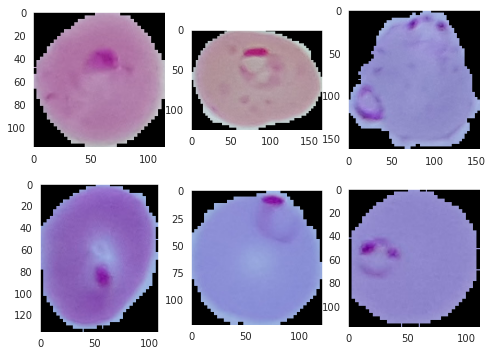

In [ ]:
fig = plt.figure(figsize=(8,6))
for i in range(6):
    idx = random.randint(0, len(parasitized_img))
    plt.subplot(2, 3, i+1)
    img = cv2.imread(path+'Parasitized/'+parasitized_img[idx])
    plt.imshow(img)

In [ ]:
par_img = plt.imread(path+'Parasitized/'+parasitized_img[0])
print("Image Shape: ",par_img.shape)

Image Shape:  (151, 130, 3)


In [ ]:
par_img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
par_img.max()

0.85882354

In [ ]:
par_img.min()

0.0

## Uninfected Image

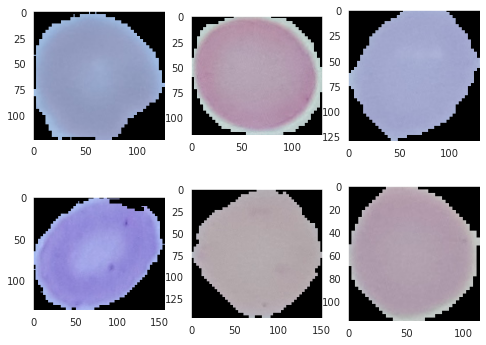

In [ ]:
fig = plt.figure(figsize=(8,6))
for i in range(6):
    idx = random.randint(0, len(uninfected_img))
    plt.subplot(2, 3, i+1)
    img = cv2.imread(path+'Uninfected/'+uninfected_img[idx])
    plt.imshow(img)

In [ ]:
Un_img = plt.imread(path+'Uninfected/'+uninfected_img[0])
print("Image Shape: ",Un_img.shape)

Image Shape:  (145, 157, 3)


In [ ]:
Un_img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
Un_img.max()

0.8392157

In [ ]:
Un_img.min()

0.0

## Image 2 Array Conversion

In [ ]:
def Image_2_array(data_dir):
    data = []
    per1,per2 = [], []
    un1, un2 = [], []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in (os.listdir(path)):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                d1, d2, _ = img_arr.shape
                if(class_num==0):
                    per1.append(d1)
                    per2.append(d2)
                if(class_num==1):
                    un1.append(d1)
                    un2.append(d2)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data), [per1, per2], [un1, un2]

In [ ]:
data, per, un = Image_2_array("/kaggle/input/cell-images-for-detecting-malaria/cell_images")

'NoneType' object has no attribute 'shape'
'NoneType' object has no attribute 'shape'


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Parasitized images shape distribution

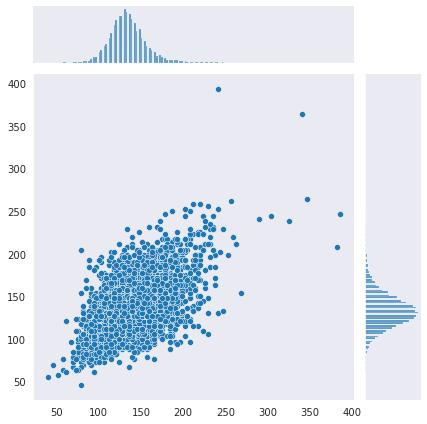

In [ ]:
sns.jointplot(x=per[0] , y=per[1])

### Uninfected Image images shape distribution

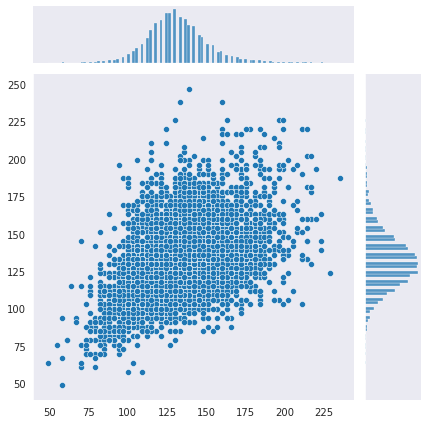

In [ ]:
sns.jointplot(x=un[0] , y=un[1])

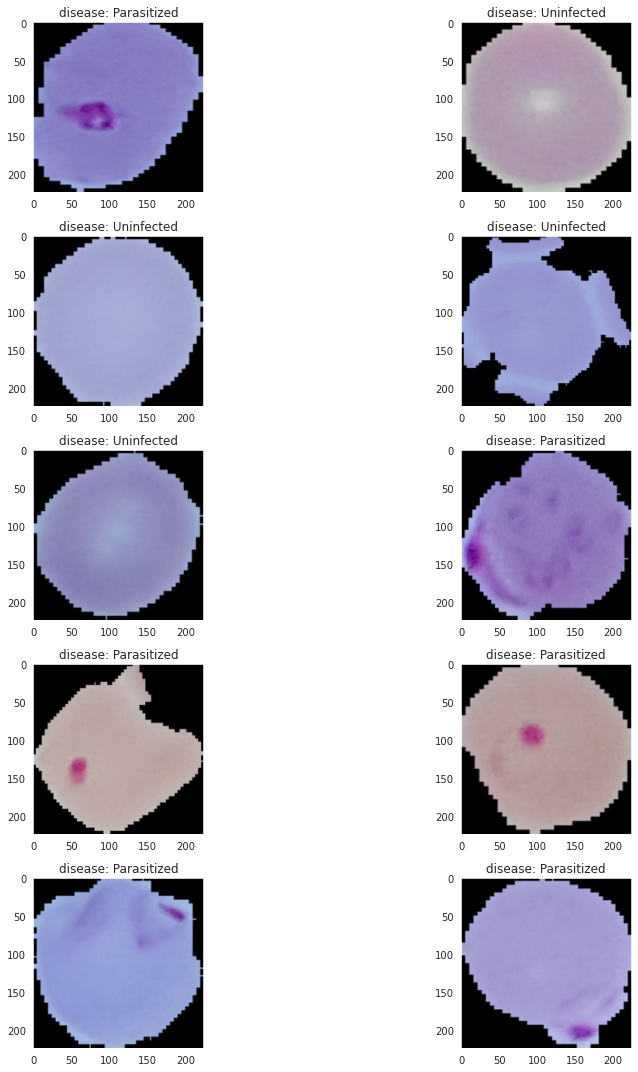

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('disease: '+labels[data[l][1]])
plt.tight_layout()

## Data preprosessing

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=30,
                             horizontal_flip=True,
                             vertical_flip=True,
                             shear_range=0.1,
                             zoom_range=0.1,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.2,
                             fill_mode='nearest')

train_data = datagen.flow_from_directory(path,
                                         shuffle=True,
                                         seed=42,
                                         target_size=(128,128),
                                         batch_size=64,
                                         class_mode = 'binary',
                                         subset = 'training')

validation_data = datagen.flow_from_directory(path,
                                              shuffle=False,
                                              seed=42,
                                              target_size=(128,128),
                                              batch_size=64,
                                              class_mode = 'binary',
                                              subset = 'validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


# CNN Model

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(128,128,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs = 10,
                    callbacks=[early_stop])

Epoch 1/10
345/345 [==============================] - 251s 719ms/step - loss: 0.7437 - acc: 0.5242 - val_loss: 0.6901 - val_acc: 0.5009
Epoch 2/10
345/345 [==============================] - 130s 378ms/step - loss: 0.6134 - acc: 0.6783 - val_loss: 0.3753 - val_acc: 0.8748
Epoch 3/10
345/345 [==============================] - 130s 378ms/step - loss: 0.3256 - acc: 0.8913 - val_loss: 0.2543 - val_acc: 0.9013
Epoch 4/10
345/345 [==============================] - 134s 389ms/step - loss: 0.2572 - acc: 0.9127 - val_loss: 0.2306 - val_acc: 0.9142
Epoch 5/10
345/345 [==============================] - 131s 380ms/step - loss: 0.2573 - acc: 0.9145 - val_loss: 0.2169 - val_acc: 0.9169
Epoch 6/10
345/345 [==============================] - 131s 380ms/step - loss: 0.2390 - acc: 0.9217 - val_loss: 0.2191 - val_acc: 0.9230
Epoch 7/10
345/345 [==============================] - 130s 378ms/step - loss: 0.2352 - acc: 0.9248 - val_loss: 0.2296 - val_acc: 0.9145


In [ ]:
pred_probabilities = model.predict(validation_data)
predictions = pred_probabilities > 0.5

In [ ]:
print(classification_report(validation_data.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2755
           1       0.88      0.96      0.92      2755

    accuracy                           0.91      5510
   macro avg       0.92      0.91      0.91      5510
weighted avg       0.92      0.91      0.91      5510



In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

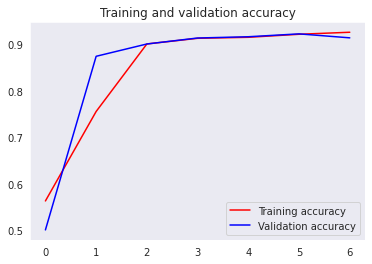

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

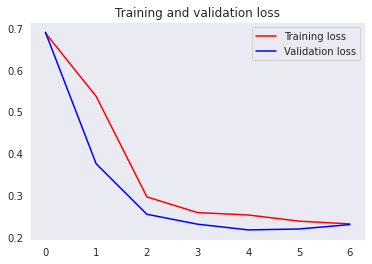

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

# Transfer Learning

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(128,128,3))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
def classifier():
    model = Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])    
    return model

In [ ]:
from keras.callbacks import  ReduceLROnPlateau
from keras.utils import to_categorical
model1 = classifier()
history_vgg = model1.fit(train_data,
                              validation_data=validation_data,
                              epochs = 10,
                              callbacks=[early_stop])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 40,365,953
Trainable params: 40,312,833
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/10
345/345 [==============================] - 156s 435ms/step - loss: 0.7793 - acc: 0.8843 - va

In [ ]:
acc = history_vgg.history['acc']
val_acc = history_vgg.history['val_acc']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

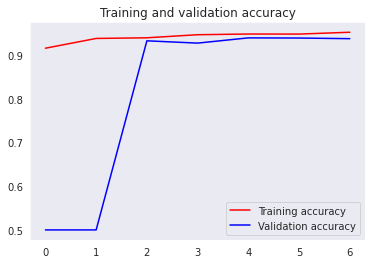

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

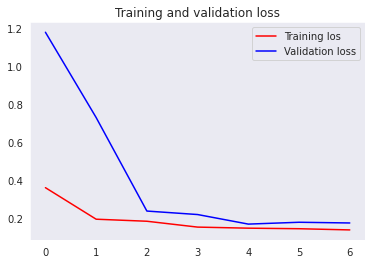

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training los')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [ ]:
pred_probabilities = model1.predict(validation_data)
predictions = pred_probabilities > 0.5
print(classification_report(validation_data.classes, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2755
           1       0.94      0.95      0.94      2755

    accuracy                           0.94      5510
   macro avg       0.94      0.94      0.94      5510
weighted avg       0.94      0.94      0.94      5510



# Thank you